# **NOTEBOOK 4:**
## County Statistics vs Diabetes Prevalence (Unemployment, poverty, income)

Using the data frames created in Notebook 3 I will look for any correlations between diabetes prevalence and unemployment rate, poverty rate, and income (median income and per capita income).

After importing the data frames, I will make graphs for each factor and see how prevalence level (very low, low, medium, high, and very high) and type of county (metropolitan and non-metropolitan) affect the data distribution.

### Set up data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter('ignore')

### Load and inspect the data

In [71]:
#import the 2017 county data frame created in Notebook 3
all_county_stats_2017_df = pd.read_csv('../data/all_county_stats_2017.csv')
all_county_stats_2017_df.sample(10)

,metro_nonmetro,county_name,state_abbr,db_prev,prev_level,prev_colorcode,metro_colorcode,pop2017,hs_grad_2017,some_college_2017,bachelors_2017,per_capita_income_2017,median_household_income_2017,poverty_2017,employed_2017,unemployed_2017,unemployment_rate_2017,uninsured_2017
1677,nonmetropolitan,pulaski county,IN,10.200191,medium,yellow,red,12534.0,88.7,30.5,11.8,24355.46,47633.0,13.2,6135.0,222.0,3.49,10.1
878,metropolitan,saluda county,SC,17.400000,very high,red,blue,20452.0,78.0,26.2,16.3,18915.96,41885.0,20.5,8507.0,347.0,3.92,15.7
234,metropolitan,richmond county,GA,13.600043,high,orange,blue,201800.0,83.0,31.2,21.0,20498.50,39430.0,24.2,81450.0,5151.0,5.95,14.4
1813,nonmetropolitan,knox county,KY,13.000172,high,orange,red,31227.0,68.0,20.6,10.0,15346.40,26061.0,34.7,9435.0,773.0,7.57,10.4
2967,nonmetropolitan,dickenson county,VA,8.700555,low,green,red,14782.0,74.5,27.8,9.3,20773.97,29916.0,23.0,4085.0,323.0,7.33,10.7
3071,nonmetropolitan,shawano county,WI,13.500241,high,orange,red,40935.0,91.0,31.5,15.8,26584.45,51751.0,11.5,20925.0,699.0,3.23,7.7
2697,nonmetropolitan,potter county,SD,9.800469,medium,yellow,red,2231.0,92.4,30.5,22.2,33152.29,51597.0,6.5,1100.0,39.0,3.42,5.9
477,metropolitan,cecil county,MD,11.300140,medium,yellow,blue,102746.0,88.8,28.9,23.0,31581.99,70516.0,9.4,50558.0,2549.0,4.80,5.5
838,metropolitan,lycoming county,PA,10.600005,medium,yellow,blue,113841.0,89.5,28.1,22.1,26920.59,50634.0,14.0,54369.0,3254.0,5.65,6.5
485,metropolitan,wicomico county,MD,13.000134,high,orange,blue,102923.0,88.6,27.5,27.8,27842.75,54493.0,15.9,48566.0,2922.0,5.68,8.3


In [72]:
#shape of this data frame
num_rows, num_cols = all_county_stats_2017_df.shape

print(f'Data frame has {num_rows} rows and {num_cols} columns.')

Data frame has 3134 rows and 18 columns.


## Unemployment Rate

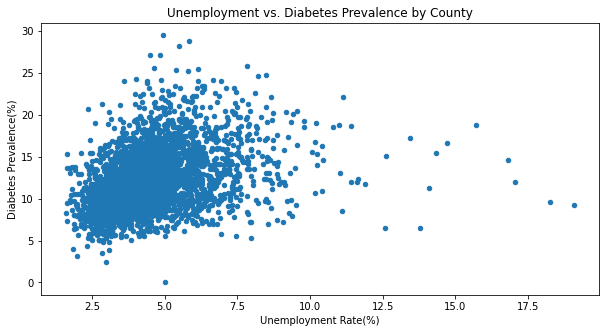

In [90]:
#make a graph for unemployment vs. diabetes prevalence
all_county_stats_2017_df.plot(kind='scatter', x='unemployment_rate_2017', y='db_prev',figsize=(10,5))
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Unemployment vs. Diabetes Prevalence by County')
plt.show()

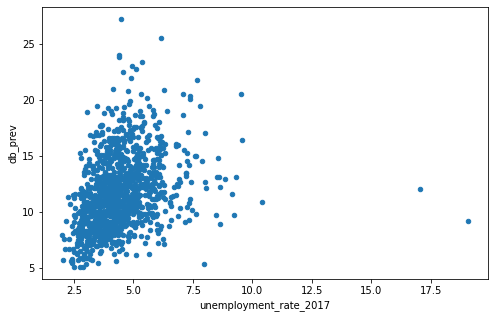

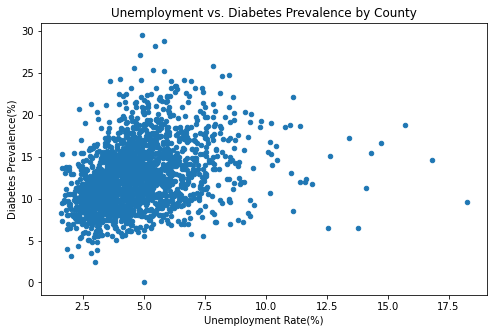

In [91]:
#compare metro vs non-metro counties
all_county_stats_2017_df.groupby('metro_nonmetro').plot(kind='scatter', x='unemployment_rate_2017', y='db_prev',figsize=(8,5))
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Unemployment vs. Diabetes Prevalence by County')
plt.show()

## Poverty

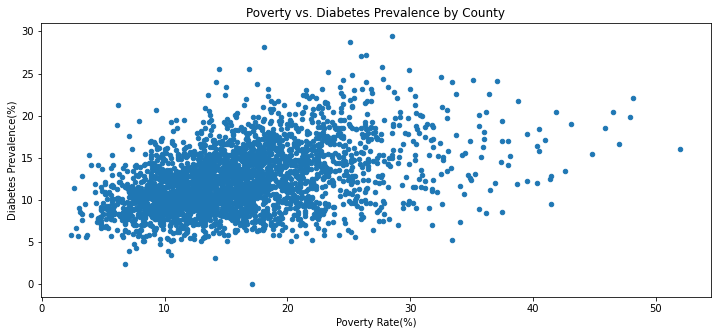

In [82]:
#make a graph for poverty rate vs. diabetes prevalence
all_county_stats_2017_df.plot(kind='scatter', x='poverty_2017', y='db_prev',figsize=(12,10))
plt.xlabel('Poverty Rate(%)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Poverty vs. Diabetes Prevalence by County')
plt.subplots_adjust(bottom=0.5)
plt.show()

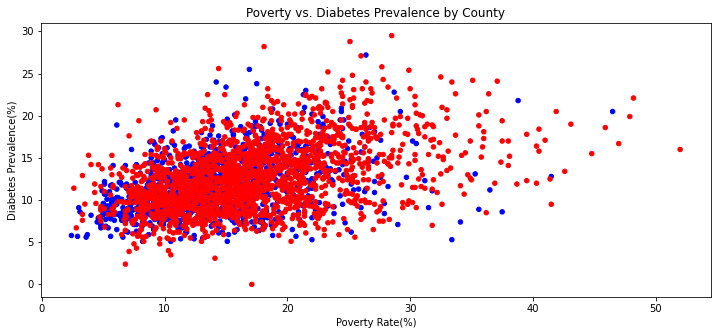

In [92]:
#make a graph for poverty rate vs. diabetes prevalence by county type
all_county_stats_2017_df.plot(kind='scatter', x='poverty_2017', y='db_prev',c='metro_colorcode',figsize=(12,10))
plt.xlabel('Poverty Rate(%)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Poverty vs. Diabetes Prevalence by County')
plt.subplots_adjust(bottom=0.5)
plt.show()

## Income

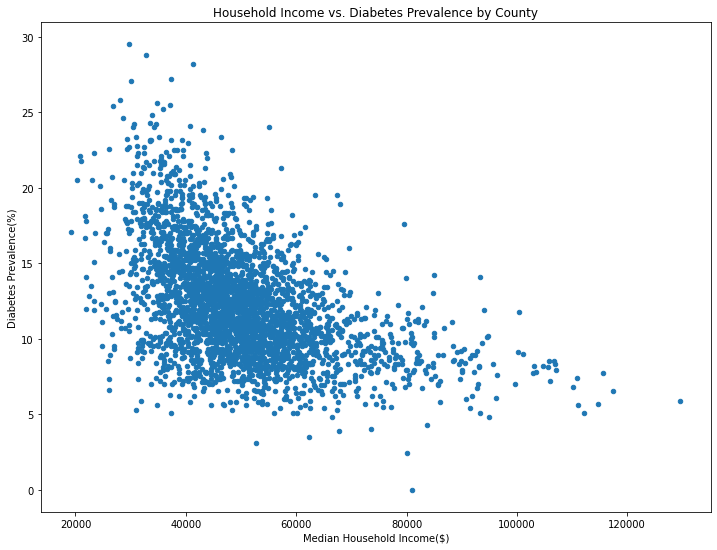

In [96]:
#make a graph for median household income rate vs. diabetes prevalence
all_county_stats_2017_df.plot(kind='scatter', x='median_household_income_2017', y='db_prev',figsize=(12,10))
plt.xlabel('Median Household Income($)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Household Income vs. Diabetes Prevalence by County')
plt.subplots_adjust(bottom=0.2)
plt.show()

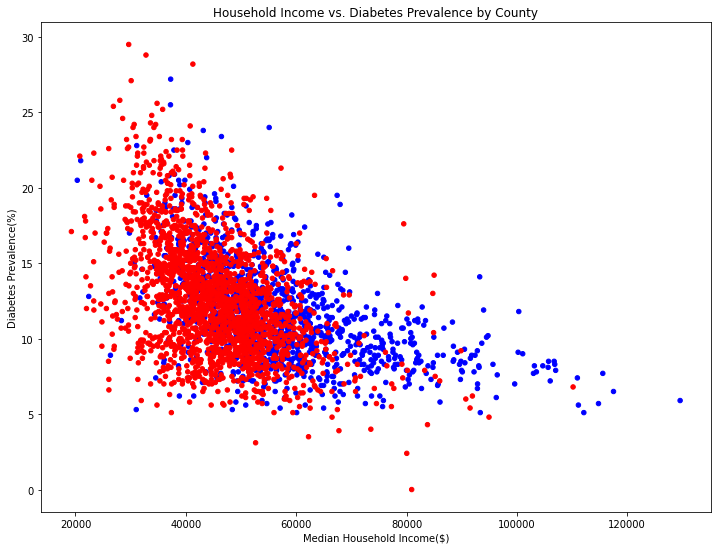

In [97]:
#make a graph for median household income rate vs. diabetes prevalence by county type
all_county_stats_2017_df.plot(kind='scatter', x='median_household_income_2017', y='db_prev',c='metro_colorcode',figsize=(12,10))
plt.xlabel('Median Household Income($)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Household Income vs. Diabetes Prevalence by County')
plt.subplots_adjust(bottom=0.2)
plt.show()

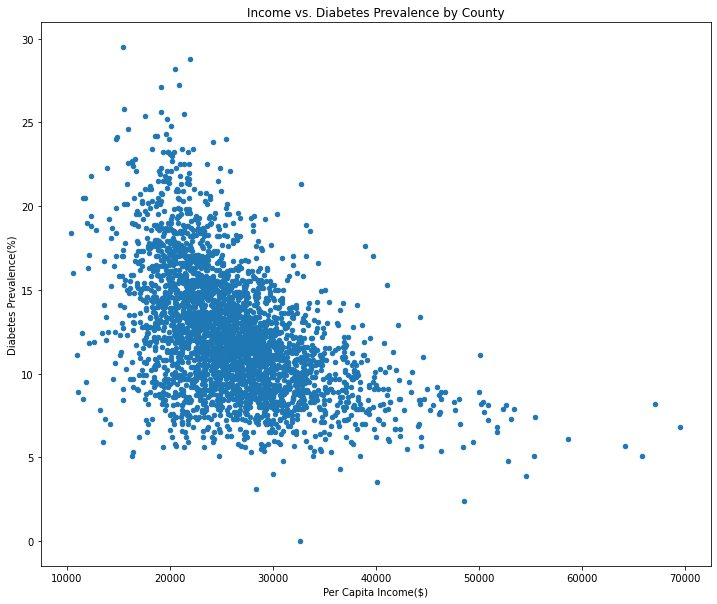

In [98]:
#make a graph for per capita household income rate vs. diabetes prevalence
all_county_stats_2017_df.plot(kind='scatter', x='per_capita_income_2017', y='db_prev',figsize=(12,10))
plt.xlabel('Per Capita Income($)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Income vs. Diabetes Prevalence by County')
plt.show()

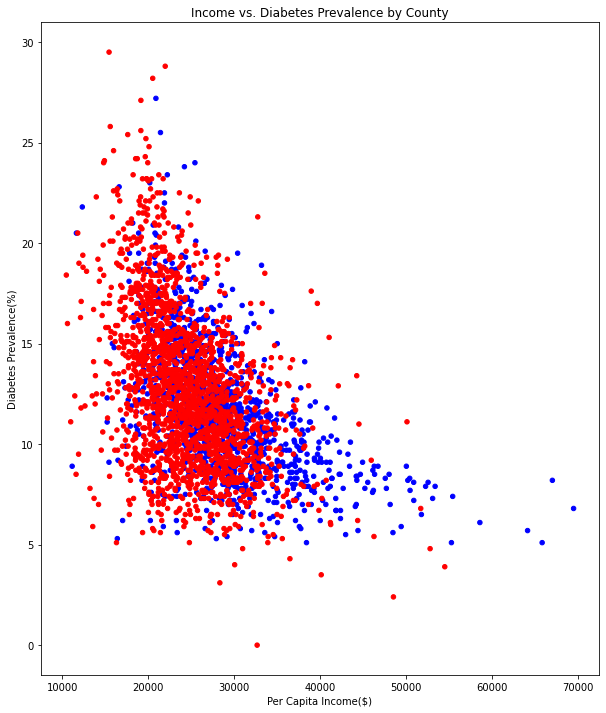

In [99]:
#make a graph for per capita household income rate vs. diabetes prevalence by county type
all_county_stats_2017_df.plot(kind='scatter', x='per_capita_income_2017', y='db_prev',c='metro_colorcode',figsize=(10,12))
plt.xlabel('Per Capita Income($)')
plt.ylabel('Diabetes Prevalence(%)')
plt.title('Income vs. Diabetes Prevalence by County')
plt.show()